## Gregory M. Eirich
## Example 
## Lab #4

## 1. Run a simple regression, with at least two Xs in it, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)  

## 2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2.  Explain why you think an interaction might be present and in what direction it would work.  Explain your results.  Did it work out?  Yes?  No?  

## 3. Extra Credit: Plot the relationship found in the interaction.

In [ ]:
Some preliminary set up code:

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

## Use the World Values Survey again.

In [16]:
os.chdir("C:/Users/gme2101/Desktop/Data Analysis Data") # change working directory
w = pd.read_csv("C:/Users/gme2101/Desktop/Data Analysis Data/WVS.csv")
w.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


## 1. Run a simple regression, and interpret your results.  (Did the results fit your expectations?  Why?  Why not?)   


## Does one's age and country (US vs. China) affect how comfortable they are working for a 30-year old?  I expect that Americans are more okay working for a young boss than those from China.  Regardless of country, I expect that older people are less comfortable working for a young boss.

## The exact question is: "Please tell me how acceptable or unacceptable you think most people in your country would find it if a suitably qualified 30 year old was appointed as their boss?" (V160)  Answers range from Completely Unacceptable (1) to Completely Acceptable (10).  

## Now, let's try a different dataset.  This is the World Values Survey.  Learn more about it here: http://www.worldvaluessurvey.org/WVSOnline.jsp  

## Or look here: http://www.thearda.com/Archive/Files/Codebooks/WVS2010_CB.asp

In [17]:
w.rename(columns={'V160':'thirtyyrold', ## this asks how much someone in your country would like to work with a 30 yr old ## 
                          'V242':'age',
                          'V164':'seventyyrold', ## this asks how much someone in your country would like to work with a 70 yr old ## 
                          'V2':'country'}, 
                 inplace=True)

In [18]:
for col in w.columns: 
    print(col)

V1
country
V2A
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V74B
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125_00
V125_01
V125_02
V125_03
V125_04
V125_05
V125_06
V125_07
V125_08
V125_09
V125_10
V125_11
V125_12
V125_13
V125_14
V125_15
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
thirtyyrold
V161
V162
V163
seventyyrold
V165
V166
V167
V168
V169
V160A
V160B
V160C
V160D
V160E
V160F
V160G
V160H
V160I
V160J
V170
V171
V172
V173
V174
V175
V176
V177
V178
V179
V

## Here is the model:

In [19]:
lm1 = smf.ols(formula = 'thirtyyrold ~ age + C(country)', data = w, subset = ((w['country']==156) | (w['country']==840)) ).fit()
print (lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            thirtyyrold   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     253.7
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          1.80e-104
Time:                        09:06:47   Log-Likelihood:                -8435.1
No. Observations:                4024   AIC:                         1.688e+04
Df Residuals:                    4021   BIC:                         1.690e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.7878      0.09

## The results suggest that, net of age, Americans (country=840) actually score lower on wanting to work for a 30 year old boss, on average, than Chinese (country=156).  Age operates as I expected: Older people are less okay working for a young boss, regardless of country, and it is statistically significant.

## A bit of a digression here:  Since lm1 generates somewhat surprising results, what about: Does one's age and country (US vs. China) affect how comfortable they are working for a 70-year old boss? ##

In [20]:
lm2 = smf.ols(formula = 'seventyyrold ~ age + C(country)', data = w, subset = ((w['country']==156) | (w['country']==840)) ).fit()
print (lm2.summary())

                            OLS Regression Results                            
Dep. Variable:           seventyyrold   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     360.9
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          6.08e-145
Time:                        09:14:23   Log-Likelihood:                -8671.1
No. Observations:                4043   AIC:                         1.735e+04
Df Residuals:                    4040   BIC:                         1.737e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.3823      0.10

## lm2 shows that Americans even more don't want to have a 70 year old boss.  It seems that Americans just don't like bosses!

## Back to the main exercise:  2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2.  Explain why you think an interaction might be present and in what direction it would work.  Explain your results.  Did it work out?  Yes?  No?  

## I include an interaction between age and country because it is still possible, regardless of their initial level of comfort with young bosses, that in China, age will matter more than in America, since there is something of an ethic of respect for elders that the US may not have.  I test for that.

In [21]:
lm3 = smf.ols(formula = 'thirtyyrold ~ age*C(country)', data = w, subset = ((w['country']==156) | (w['country']==840)) ).fit()
print (lm3.summary())

                            OLS Regression Results                            
Dep. Variable:            thirtyyrold   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          7.18e-104
Time:                        09:20:59   Log-Likelihood:                -8433.6
No. Observations:                4024   AIC:                         1.688e+04
Df Residuals:                    4020   BIC:                         1.690e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.97

## The interaction shows that as age increases, displeasure with a 30 year old boss grows faster for Chinese than American people, but it is only marginally statistically significant (p=0.082).  So there is mild evidence that age matters more in China than in the US regarding comfort with a young boss.

## 3. Extra Credit: Plot the relationship found in the interaction.  This plot shows that dynamic.

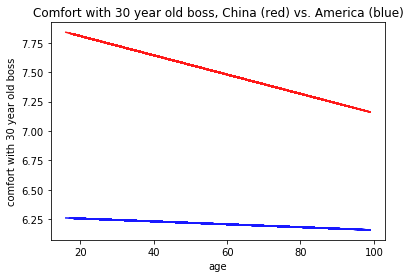

In [23]:
plt.plot(w["age"], lm3.params[0] + lm3.params[1] * 1 + lm3.params[2] * w["age"] + lm3.params[3] * 1 * w["age"], 'b', label = 'America', alpha = 0.9)
plt.plot(w["age"], lm3.params[0] + lm3.params[1] * 0 + lm3.params[2] * w["age"] + lm3.params[3] * 0 * w["age"], 'r', label = 'China', alpha = 0.9)
plt.title("Comfort with 30 year old boss, China (red) vs. America (blue)")
plt.xlabel("age")
plt.ylabel("comfort with 30 year old boss")
plt.show()